<a href="https://colab.research.google.com/github/imrankhanjoya/algotrading/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MACD indictor for trading 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("fivethirtyeight")
!pip install yfinance
import yfinance as yf

In [ ]:
symbol_list = ['TATAMOTORS.NS']

data = yf.download(tickers='TATAMOTORS.NS',period="1d",interval="5m")
df = pd.DataFrame(data)


[*********************100%***********************]  1 of 1 completed


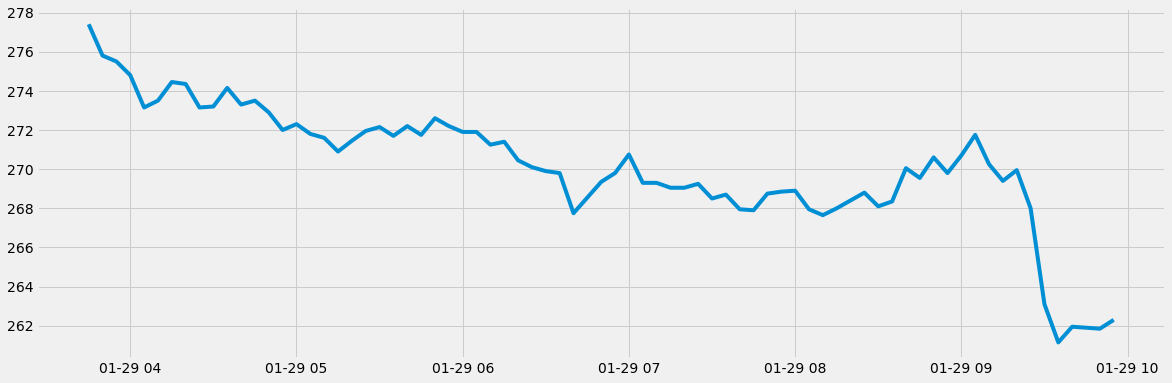

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(df['Close'],label="Close")

In [ ]:
#calculate MACD
#calculate EMA
ShortEma = df.Close.ewm(span=12,adjust=False).mean()
LongEma  = df.Close.ewm(span=26,adjust=False).mean()
df['MACD'] = ShortEma - LongEma
df['Signal'] = df.MACD.ewm(span=9,adjust=False).mean()



In [ ]:

# df.loc[((df['MACD'].shift(1) == df['Signal'].shift(1)) & (df['MACD'] > df['Signal'])),"Buy" ] = True
# df.loc[((df['MACD'].shift(1) == df['Signal'].shift(1)) & (df['MACD'] < df['Signal']) ),"Sell" ] = True

df['S_S_D'] = df['MACD'].shift(1) - df['Signal'].shift(1)
df['S_D'] =  df['MACD'] - df['Signal']
df['Buy'] = np.where(((df['S_S_D'] < 0) & (df['S_D']>0)),df['Close']+1,None)
df['Sell'] = np.where(((df['S_S_D'] > 0) & (df['S_D']<0)),df['Close']+1,None)
# df['Buy'] = np.where(((df['S_S_D'] < 0) & (df['S_D']>0)),df['S_S_D']+0.01,None)
# df['Sell'] = np.where(((df['S_S_D'] > 0) & (df['S_D']<0)),df['S_S_D']+0.01,None)



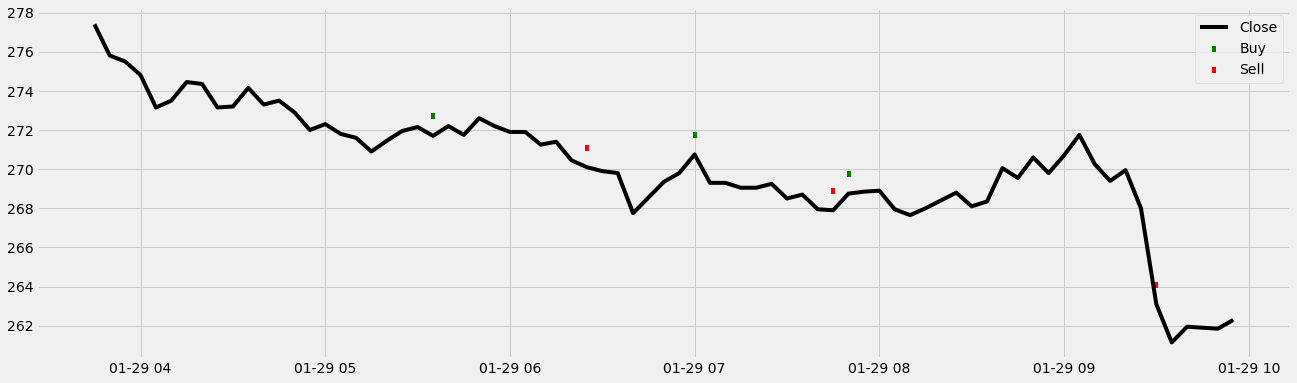

In [ ]:
plt.figure(figsize=(20,6))
#plt.bar(df.index,df['Volume'].values)

plt.plot(df['Close'],label="Close",color="Black")
# plt.plot(df['Signal'],label="Signal",color="Green")
# plt.plot(df['MACD'],label="MACD",color="Blue")
plt.scatter(df.index,df['Buy'],color="Green",label="Buy",marker="|",alpha=1)
plt.scatter(df.index,df['Sell'],color="Red",label="Sell",marker="|",alpha=1)
plt.legend()